# 강혜수 과제

In [181]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_train_org = pd.read_csv('house_price_train.csv')
house_df_test_org = pd.read_csv('house_price_test.csv')
house_df_org = pd.concat([house_df_train_org,house_df_test_org])
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0


In [182]:
house_df_ohe = pd.get_dummies(house_df)
print(house_df_ohe.shape)

(2919, 290)


## EDA

In [183]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [184]:
isnull_series = house_df.isnull().sum()
print(f'null값 알아보기:\n{isnull_series[isnull_series > 0].sort_values(ascending=False)}')

null값 알아보기:
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64


In [185]:
house_df.drop(['Id','LotFrontage','GarageCond','GarageQual','GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','Alley','Fence','FireplaceQu','MiscFeature','PoolQC'], axis=1 , inplace=True)
house_df.fillna(house_df.mean(),inplace=True)

isnull_series = house_df.isnull().sum()
print(isnull_series[isnull_series > 0].sort_values(ascending=False))

#fillna로 결측치를 채운 다음에 다시 프린트 해도 null 값이 아직 나오는 이유를 모르겠습니다.

MasVnrType     24
MSZoning        4
Utilities       2
Functional      2
Exterior1st     1
Exterior2nd     1
Electrical      1
KitchenQual     1
SaleType        1
dtype: int64


In [186]:
house_df_ohe = pd.get_dummies(house_df)

isnull_series = house_df_ohe.isnull().sum()
print(isnull_series[isnull_series > 0].sort_values(ascending=False))

Series([], dtype: int64)


In [187]:
house_df_ohe.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005422,-0.064302,-0.072520,-0.125978,...,0.001218,-0.040736,-0.018118,0.039911,0.003719,0.011253,0.037366,-0.023187,0.027341,-0.045302
LotArea,-0.201730,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125354,0.194021,0.084055,0.021361,...,-0.015732,0.031601,-0.004067,-0.014035,-0.014771,-0.020429,0.024241,0.017927,-0.022898,0.033434
OverallQual,0.033638,0.100541,1.000000,-0.093847,0.597554,0.571532,0.430961,0.281704,-0.042755,0.275072,...,-0.045148,0.338330,-0.052783,-0.194091,-0.127006,-0.049636,-0.040738,-0.023605,-0.134282,0.333192
OverallCond,-0.065625,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.135752,-0.050403,0.041489,-0.138162,...,-0.014818,-0.148122,-0.018578,0.162551,-0.060231,-0.051836,-0.025736,-0.032058,0.168425,-0.143560
YearBuilt,0.034409,0.024128,0.597554,-0.368477,1.000000,0.612235,0.312579,0.279547,-0.027591,0.130457,...,-0.044896,0.343880,-0.013920,-0.203944,-0.120524,-0.077741,-0.025116,-0.036093,-0.137934,0.339458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.011253,-0.020429,-0.049636,-0.051836,-0.077741,-0.078213,-0.018629,-0.028073,-0.018833,-0.006644,...,-0.003368,-0.019187,-0.003150,0.025380,-0.016953,1.000000,-0.005850,-0.008130,-0.138487,-0.019448
SaleCondition_Alloca,0.037366,0.024241,-0.040738,-0.025736,-0.025116,-0.034022,-0.017984,0.026104,-0.026690,-0.061471,...,-0.004773,-0.027190,-0.004464,0.035967,-0.024025,-0.005850,1.000000,-0.011521,-0.196256,-0.027560
SaleCondition_Family,-0.023187,0.017927,-0.023605,-0.032058,-0.036093,-0.049794,-0.017978,-0.026233,-0.001997,0.024037,...,0.045983,-0.037787,0.050036,-0.014418,-0.033388,-0.008130,-0.011521,1.000000,-0.272742,-0.038301
SaleCondition_Normal,0.027341,-0.022898,-0.134282,0.168425,-0.137934,-0.102889,-0.069411,-0.017694,0.068774,-0.149825,...,0.007156,-0.643684,-0.087334,0.620346,-0.568743,-0.138487,-0.196256,-0.272742,1.000000,-0.652444


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

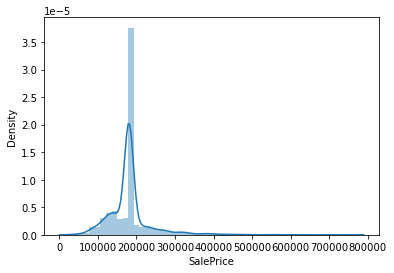

In [188]:
sns.distplot(house_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

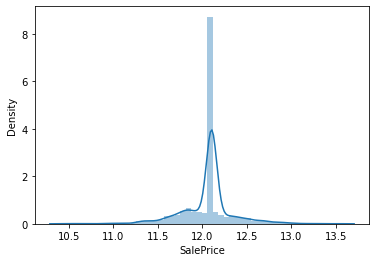

In [189]:
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [190]:
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

## Model training

In [191]:
house_train = house_df[:len(house_df_train_org)]
house_test = house_df[len(house_df_train_org):]

In [192]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [193]:
# could not convert string to float이라는 value error이 뜨는데,
# 위에서 dummies 했는데 왜 이럴까요

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = house_train.drop(['SalePrice'],axis=1,inplace=False)
X_test = house_test.drop(['SalePrice'],axis=1,inplace=False)
y_train = house_train['SalePrice']
y_test = house_test['SalePrice']

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

ValueError: could not convert string to float: 'RL'

In [ ]:
# 상관계수 찾아서 피처를 삭제해서 다시 회귀분석 해보기 (오류때문에 확인못함)
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_features.columns )
coeff.sort_values(ascending=False)

SalePrice_corr = house_train.corr()['SalePrice']
print(SalePrice_corr[(SalePrice_corr < 0.01) & (SalePrice_corr > -0.01)].sort_values(ascending=False))